In [14]:
import pandas as pd
import json
import tikzplotlib

path_to_refs = "references_07022023.json"

In [15]:

df = pd.read_json(path_to_refs)
df = pd.concat([df.drop(['tags'], axis=1), df['tags'].apply(pd.Series)], axis=1)
df


title  \
0    Backstabber's Knife Collection: A Review of Op...   
1    ATT&CK T1195.002: Supply Chain Compromise: Com...   
2    Typosquatting programming language package man...   
3    I Know What You Imported Last Summer: A study ...   
4    Typosquatting and Combosquatting Attacks on th...   
..                                                 ...   
364  An Empirical Study on Software Bill of Materia...   
365            What is Software Supply Chain Security?   
366  Malicious Source Code Detection Using Transformer   
367  Alice in (Software Supply) Chains: Risk Identi...   
368  Policy Transparency: Authorization Logic Meets...   

                                                  link  \
0    https://link.springer.com/chapter/10.1007/978-...   
1       https://attack.mitre.org/techniques/T1195/002/   
2    https://incolumitas.com/2016/06/08/typosquatti...   
3                     https://arxiv.org/abs/2102.06301   
4        https://ieeexplore.ieee.org/document/9229803/   
..                                                 ...   
364                   https://arxiv.org/abs/2301.05362   
365                   https://arxiv.org/abs/2209.04006   
366                   https://arxiv.org/abs/2209.07957   
367  https://link.springer.com/chapter/10.1007/978-...   
368             https://research.google/pubs/pub51673/   

                                               vectors  \
0    [{'avId': 'AV-000', 'avName': 'Conduct Open-So...   
1    [{'avId': 'AV-000', 'avName': 'Conduct Open-So...   
2    [{'avId': 'AV-200', 'avName': 'Create Name Con...   
3    [{'avId': 'AV-200', 'avName': 'Create Name Con...   
4    [{'avId': 'AV-201', 'avName': 'Combosquatting'...   
..                                                 ...   
364  [{'avId': 'AV-000', 'avName': 'Conduct Open-So...   
365  [{'avId': 'AV-000', 'avName': 'Conduct Open-So...   
366  [{'avId': 'AV-000', 'avName': 'Conduct Open-So...   
367  [{'avId': 'AV-000', 'avName': 'Conduct Open-So...   
368  [{'avId': 'AV-000', 'avName': 'Conduct Open-So...   

                                            safeguards  \
0                                                  NaN   
1                                                  NaN   
2    [{'sgId': 'SG-010', 'sgName': 'Prevent Script ...   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
364  [{'sgId': 'SG-001', 'sgName': 'Software Bill o...   
365                                                NaN   
366  [{'sgId': 'SG-005', 'sgName': 'Application Sec...   
367        [{'sgId': 'SG-023', 'sgName': 'Audit'}, {}]   
368  [{'sgId': 'SG-001', 'sgName': 'Software Bill o...   

                       contents    year  \
0               [peer-reviewed]  2020.0   
1                    [standard]  2020.0   
2    [thesis, proof-of-concept]  2016.0   
3                            []  2021.0   
4               [peer-reviewed]  2020.0   
..                          ...     ...   
364                         NaN  2023.0   
365                         NaN  2022.0   
366                         NaN  2022.0   
367             [peer-reviewed]  2022.0   
368             [peer-reviewed]  2022.0   

                                            ecosystems             packages  
0                                                  NaN                  NaN  
1                                                  NaN                  NaN  
2                           [Python, JavaScript, Ruby]                  NaN  
3                                             [Python]                  NaN  
4                                             [Python]                  NaN  
..                                                 ...                  ...  
364                                                NaN                  NaN  
365                                                NaN                  NaN  
366                                       

# References per year

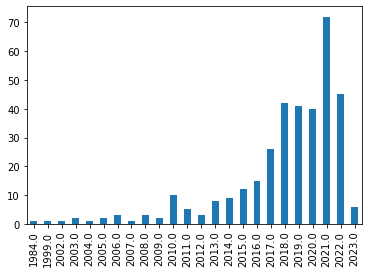

In [16]:
years = ['1983','...','1999','2000', '2001', '2002','2003','2004','2005','2006','2007', '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']


df["year"][df["year"]!=0].value_counts().sort_index().plot.bar(x=years)
tikzplotlib.save("all-refs-years.tex")


In [17]:
df1 = df.contents.dropna()
mask1 = df1.apply(lambda x: "attack" in x)
print("Total", df1.count())
print("Attacks:", df1[mask1].count())
mask2 = df1.apply(lambda x: "peer-reviewed" in x)

print("Peer-reviewed:", df1[mask2].count())


Total 344
Attacks: 81
Peer-reviewed: 126


Attacks


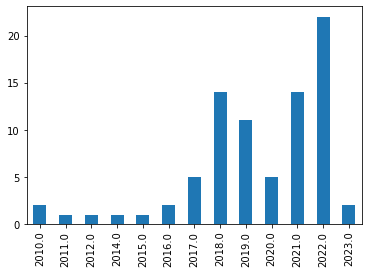

In [18]:

tmp = df[df["contents"].notna()]
attack_refs = tmp[mask1]
print("Attacks")
attack_refs["year"][attack_refs["year"]!=0].value_counts().sort_index().plot.bar(x=years)

tikzplotlib.save("attack-refs-years.tex")


Peer-Reviewed


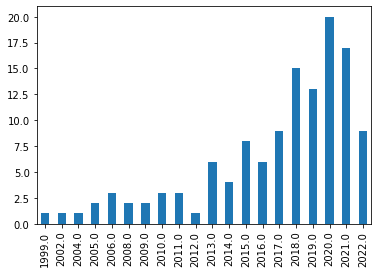

In [19]:

peerrev_refs = tmp[mask2]
print("Peer-Reviewed")

peerrev_refs["year"][peerrev_refs["year"]!=0].value_counts().sort_index().plot.bar(x=years)

tikzplotlib.save("peerrev-refs-years.tex")



# Analysis per attack vector


In [20]:
ref_file = json.load(open(path_to_refs))

final_dict = {}
# Check only for "attack" references types
for ref in ref_file:
    if "contents" in ref["tags"].keys():
        if "attack" in ref["tags"]["contents"]:
            if "vectors" in ref.keys():
                for v in ref["vectors"]:
                    if "scopeAvId" not in v.keys():
                        if v["avId"][:4] not in final_dict.keys():
                            final_dict[v["avId"][:4]] = 0
                        final_dict[v["avId"][:4]] += 1 
                        if "AV-6" in v["avId"]:
                            print(ref)
                    else:
                        if v["scopeAvId"][:4] not in final_dict.keys():
                            final_dict[v["scopeAvId"][:4]] = 0
                        final_dict[v["scopeAvId"][:4]] += 1

                #print(ref["vectors"])
print(final_dict)

{'title': 'Security Issues in Language-based Software Ecosystems', 'link': 'https://arxiv.org/abs/1903.02613', 'vectors': [{'avId': 'AV-200', 'avName': 'Create Name Confusion with Legitimate Package'}, {'avId': 'AV-204', 'avName': 'Typosquatting'}, {'avId': 'AV-302', 'avName': 'Contribute as Maintainer'}, {'avId': 'AV-402', 'avName': 'Tamper Build Job as Maintainer'}, {'avId': 'AV-504', 'avName': 'Distribute as Package Maintainer'}, {'avId': 'AV-501', 'avName': 'Dangling Reference'}, {'avId': 'AV-603', 'avName': 'Reuse of Compromised Credentials'}], 'safeguards': [{'sgId': 'SG-012', 'sgName': 'Typo Detection'}, {'sgId': 'SG-011', 'sgName': 'Typo Guard'}, {'sgId': 'SG-013', 'sgName': 'Use of Security, Quality and Health Metrics'}], 'tags': {'ecosystems': ['JavaScript', 'Python'], 'packages': ['event-stream', 'Go-bindata', 'mailparser', 'ESLint-scope', 'conventional-changelog'], 'contents': ['attack'], 'year': 2019}}
{'AV-1': 7, 'AV-3': 20, 'AV-2': 26, 'AV-4': 14, 'AV-5': 25, 'AV-6': 1}


In [21]:
ref_file = json.load(open(path_to_refs))

final_dict = {}
# Check only for "peer-reviewed" references types
for ref in ref_file:
    if "contents" in ref["tags"].keys():
        if "peer-reviewed" in ref["tags"]["contents"]:
            if "vectors" in ref.keys():
                for v in ref["vectors"]:
                    if "scopeAvId" not in v.keys():
                        if v["avId"][:4] not in final_dict.keys():
                            final_dict[v["avId"][:4]] = 0
                        final_dict[v["avId"][:4]] += 1 
                        if "AV-6" in v["avId"]:
                            print(ref)
                    else:
                        if v["scopeAvId"][:4] not in final_dict.keys():
                            final_dict[v["scopeAvId"][:4]] = 0
                        final_dict[v["scopeAvId"][:4]] += 1

                #print(ref["vectors"])
print(final_dict)

{'title': 'Small World with High Risks: A Study of Security Threats in the npm Ecosystem (USENIX)', 'link': 'https://www.usenix.org/conference/usenixsecurity19/presentation/zimmerman', 'vectors': [{'avId': 'AV-200', 'avName': 'Create Name Confusion with Legitimate Package'}, {'avId': 'AV-602', 'avName': 'Take-over Legitimate Account'}, {'avId': 'AV-800', 'avName': 'Become Maintainer'}, {'avId': 'AV-100', 'avName': 'Develop and Advertise Distinct Malicious Package from Scratch'}, {'avId': 'AV-501', 'avName': 'Dangling Reference'}], 'safeguards': [{'sgId': 'SG-039', 'sgName': 'Enstablish vetting process for Open-Source components'}], 'tags': {'ecosystems': ['JavaScript'], 'packages': [], 'contents': ['peer-reviewed'], 'year': 2019}}
{'title': 'Practical Automated Detection of Malicious npm Packages (ICSE)', 'link': 'https://dl.acm.org/doi/abs/10.1145/3510003.3510104', 'vectors': [{'avId': 'AV-100', 'avName': 'Develop and Advertise Distinct Malicious Package from Scratch'}, {'avId': 'AV-2

# Safeguards popularity

In [22]:
ref_file = json.load(open(path_to_refs))

final_dict = {}
# Check only for "peer-reviewed" references types
for ref in ref_file:
    if "safeguards" in ref.keys():
        for v in ref["safeguards"]:
            if "sgId" in v.keys(): 
                if v["sgId"] not in final_dict.keys():
                    final_dict[v["sgId"]] = 0
                final_dict[v["sgId"]] += 1 

print(dict(sorted(final_dict.items(), key=lambda item: item[1],reverse=True)))

{'SG-005': 46, 'SG-003': 27, 'SG-001': 16, 'SG-025': 15, 'SG-002': 13, 'SG-007': 13, 'SG-023': 12, 'SG-043': 11, 'SG-004': 11, 'SG-013': 11, 'SG-037': 10, 'SG-011': 8, 'SG-014': 8, 'SG-039': 7, 'SG-009': 6, 'SG-019': 6, 'SG-028': 6, 'SG-024': 6, 'SG-012': 5, 'SG-029': 5, 'SG-017': 5, 'SG-022': 5, 'SG-026': 5, 'SG-036': 5, 'SG-010': 4, 'SG-027': 4, 'SG-006': 3, 'SG-032': 2, 'SG-033': 2, 'SG-021': 2, 'SG-031': 2, 'SG-040': 2, 'SG-042': 2, 'SG-016': 2, 'SG-034': 1, 'SG-018': 1, 'SG-020': 1, 'SG-030': 1, 'SG-035': 1, 'SG-015': 1}


In [23]:
ref_file = json.load(open(path_to_refs))

final_dict = {}
# Check only for "peer-reviewed" references types
for ref in ref_file:
    if "contents" in ref["tags"].keys():
        if "peer-reviewed" in ref["tags"]["contents"]:
            if "safeguards" in ref.keys():
                for v in ref["safeguards"]:
                    if "sgId" in v.keys(): 
                        if v["sgId"] not in final_dict.keys():
                            final_dict[v["sgId"]] = 0
                        final_dict[v["sgId"]] += 1 

                #print(ref["vectors"])
print(dict(sorted(final_dict.items(), key=lambda item: item[1],reverse=True)))

{'SG-005': 26, 'SG-003': 14, 'SG-025': 10, 'SG-023': 8, 'SG-007': 8, 'SG-043': 7, 'SG-037': 6, 'SG-009': 5, 'SG-011': 5, 'SG-039': 5, 'SG-004': 5, 'SG-001': 5, 'SG-002': 4, 'SG-013': 4, 'SG-017': 3, 'SG-014': 3, 'SG-036': 3, 'SG-012': 2, 'SG-029': 2, 'SG-019': 2, 'SG-028': 2, 'SG-016': 2, 'SG-022': 2, 'SG-024': 2, 'SG-032': 1, 'SG-033': 1, 'SG-034': 1, 'SG-006': 1, 'SG-015': 1, 'SG-027': 1}
